# K-means algorithm
Author: Ryan Liao 
Date: 2022/01/22

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [322]:
def Normalize(data,method = 'Standard'):
    "Normalize data by: [Standard, Normalize, MinMax] methods"
    if method == 'Standard':
        out = (data - data.mean(axis=0))/data.std(axis=0)
    elif method == 'Normalize':
        out = data / np.linalg.norm(data,axis=0)
    elif method == 'MinMax':
        out = (data - data.min(axis = 0))/ (data.max(axis = 0) - data.min(axis = 0))
    return out 
    
def distance(v1,v2):
    "Elucidian Distance" 
    return np.linalg.norm(v1-v2)

def Get_Labs(data,K_means):
    "Return the labels of data based on current K_means"
    Temp = np.array([np.linalg.norm(data - center,axis=1) for center in K_means])
    label = Temp.argmin(axis=0)
    return label 

def centroid(data):
    return data.mean(axis=0) 

def K_means_plot(df, K_means,K_means_new = None):
    colors = (i for i in plt.cm.Spectral(np.linspace(0,1, len(set(df['Lab'])))))
    for lab in set(df['Lab']):
        _temp = df.query(f'Lab == {lab}')
        color = colors.__next__()
        plt.scatter(_temp[0],_temp[1],marker = '.',color = color)
        plt.scatter(K_means[lab][0],K_means[lab][1],marker= '<',
                    s = 150,color = color,edgecolors='black')
        if K_means_new is not None:
            plt.scatter(K_means_new[lab][0],K_means_new[lab][1],marker= 'X',
                    s = 150,color = color,edgecolors='black')

In [326]:
data = pd.read_csv('xclara.csv')

In [327]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


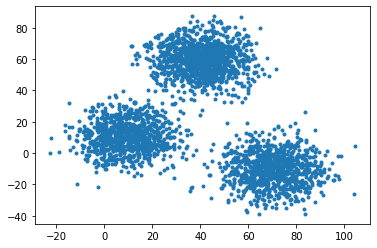

In [328]:
plt.scatter(data['V1'],data['V2'],marker= '.')

In [329]:
data = np.array(data)
k = 3 #Given
#Step0:Normalize (Standarize) the data 
def Normalize(data,method = 'Standard'):
    "Normalize data by: [Standard, Normalize, MinMax] methods"
    if method == 'Standard':
        out = (data - data.mean(axis=0))/data.std(axis=0)
    elif method == 'Normalize':
        out = data / np.linalg.norm(data,axis=0)
    elif method == 'MinMax':
        out = (data - data.min(axis = 0))/ (data.max(axis = 0) - data.min(axis = 0))
    return out 
#Step1:K initial 'means'
data = Normalize(data)
K_means = np.random.uniform(data.min(),data.max(),(k,data.shape[1])) #(k,dimension)

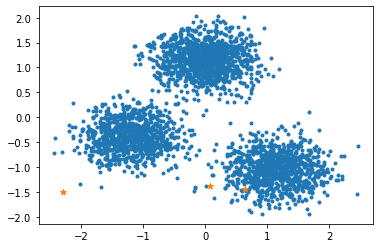

In [330]:
plt.scatter(data[:,0],data[:,1],marker= '.')
plt.scatter(K_means[:,0],K_means[:,1],marker="*")

In [331]:
#Step 2:create clusters 
df = pd.DataFrame(data)
df['Lab'] = Get_Labs(data,K_means)

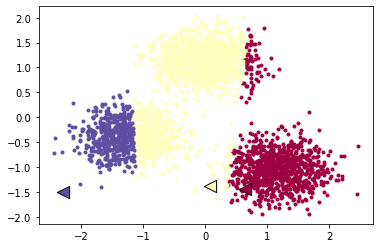

In [332]:
K_means_plot(df,K_means)

In [333]:
#Step 3: Updating the centroid 
def centroid(data):
    return data.mean(axis=0) 

K_means_new = np.array([centroid(df.query(f'Lab == {lab}').drop('Lab',axis = 1))
     for lab in set(df['Lab'])])

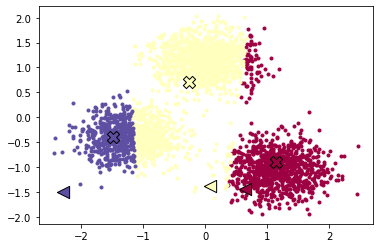

In [334]:
K_means_plot(df,K_means,K_means_new)

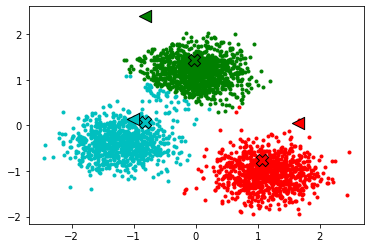

In [180]:
#Update labels 
df['Lab'] = Get_Labs(data,K_means_new)
K_means_plot(df,K_means,K_means_new)

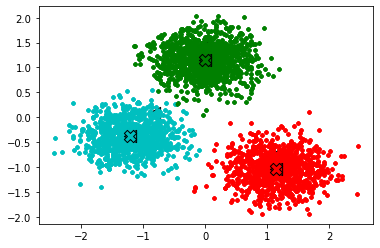

In [183]:
#Step 4:Repeat the process untill stop condition met
tol = 1e-3
while np.linalg.norm(K_means - K_means_new) > tol: #Stop condition
    K_means = K_means_new #Move on 
    K_means_new = np.array([centroid(df.query(f'Lab == {lab}').drop('Lab',axis = 1))
     for lab in set(df['Lab'])])
    df['Lab'] = Get_Labs(data,K_means_new)
    K_means_plot(df,K_means,K_means_new)

In [323]:
#Putting them together 
def K_Means(data,k,normalization_method = 'Standard',k_means_plus_plus = True,
            tol = 1e-5, plot_show = False):
    from sklearn.cluster import kmeans_plusplus
    #Step0:Normalize (Standarize) the data 
    data = Normalize(np.array(data),normalization_method)
    #Step1:K initial 'means'
    if k_means_plus_plus:
        K_means, indices = kmeans_plusplus(np.array(data), n_clusters=k, random_state=0)
    else:
        K_means = np.random.uniform(data.min(),data.max(),(k,data.shape[1])) #(k,dimension)
    #Step 2:create clusters 
    df = pd.DataFrame(data)
    df['Lab'] = Get_Labs(data,K_means)
    #Step 3: Updating the centroid 
    K_means_new = np.array([centroid(df.query(f'Lab == {lab}').drop('Lab',axis = 1))
        for lab in set(df['Lab'])])
    if plot_show:
        K_means_plot(df,K_means,K_means_new)
        plt.show()
    while np.linalg.norm(K_means - K_means_new) > tol: #Stop condition
        K_means = K_means_new #Move on 
        K_means_new = np.array([centroid(df.query(f'Lab == {lab}').drop('Lab',axis = 1))
        for lab in set(df['Lab'])])
        df['Lab'] = Get_Labs(data,K_means_new)
        if plot_show:
            K_means_plot(df,K_means,K_means_new)
            plt.show()
    return list(df['Lab'])

# Play Ground

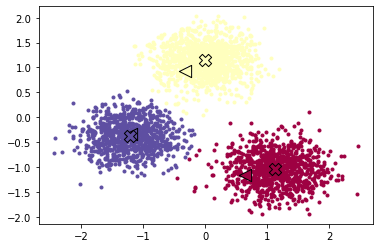

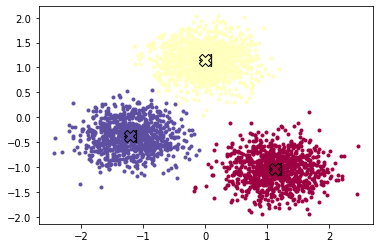

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [324]:
K_Means(data,k = 3,plot_show=1)

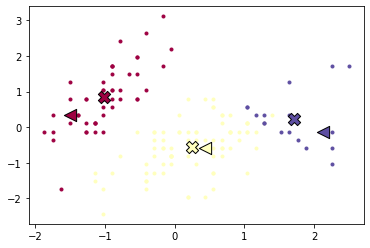

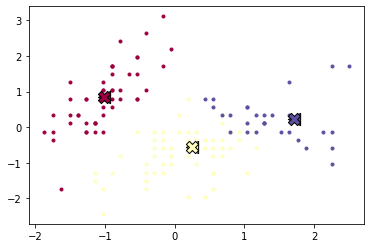

In [325]:
data = pd.read_csv('Iris.csv')
lab = K_Means(data.drop(['Id','Species'],axis = 1),k = 3,plot_show=1)

In [299]:
data['Lab'] = lab
pd.crosstab(data['Lab'],data['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Lab,,,
0,50,0,0
1,0,48,23
2,0,2,27


In [307]:
fishes=pd.read_csv("fish.csv", header=None, index_col=False, skiprows=1, usecols=range(1,7))


In [308]:
list_species=['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

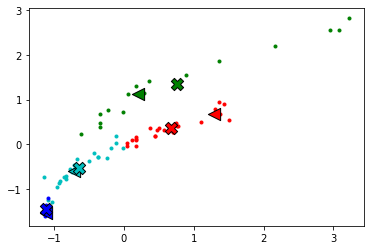

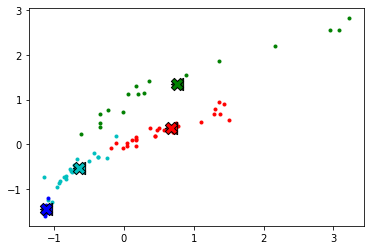

In [309]:
lab_fish = K_Means(fishes,k = 4,plot_show=1)

In [310]:
fishes['lab'] = lab_fish
fishes['Spe'] = list_species
pd.crosstab(fishes['lab'],fishes['Spe'])

Spe,Bream,Pike,Roach,Smelt
lab,,,,
0,3,0,20,1
1,0,17,0,0
2,31,0,0,0
3,0,0,0,13


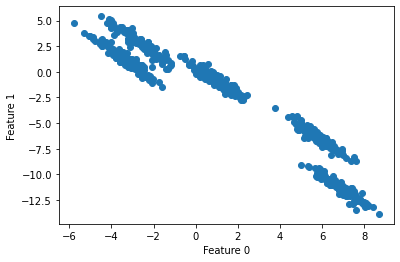

In [335]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

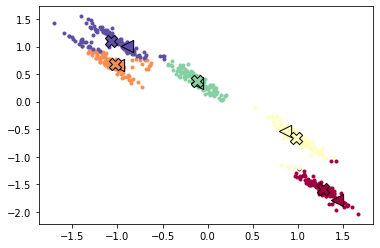

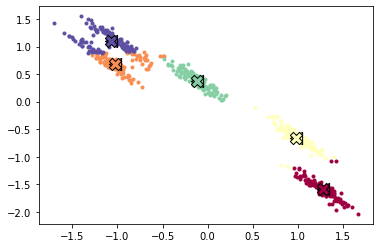

[4,
 2,
 0,
 2,
 2,
 4,
 2,
 3,
 2,
 1,
 4,
 1,
 2,
 1,
 0,
 0,
 3,
 3,
 4,
 2,
 1,
 3,
 0,
 0,
 3,
 4,
 0,
 2,
 3,
 1,
 4,
 2,
 4,
 0,
 0,
 2,
 2,
 0,
 3,
 4,
 2,
 4,
 3,
 0,
 1,
 3,
 2,
 2,
 3,
 0,
 3,
 0,
 3,
 2,
 4,
 2,
 1,
 1,
 1,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 4,
 4,
 0,
 0,
 4,
 1,
 4,
 2,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 1,
 0,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 0,
 4,
 0,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 0,
 1,
 3,
 4,
 2,
 0,
 0,
 4,
 1,
 2,
 4,
 0,
 3,
 2,
 3,
 0,
 3,
 3,
 1,
 3,
 0,
 4,
 4,
 3,
 4,
 3,
 0,
 1,
 0,
 3,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 3,
 0,
 1,
 4,
 2,
 4,
 3,
 4,
 3,
 2,
 0,
 0,
 1,
 1,
 0,
 4,
 1,
 3,
 0,
 1,
 2,
 0,
 3,
 4,
 4,
 2,
 3,
 4,
 3,
 4,
 2,
 1,
 3,
 1,
 4,
 3,
 2,
 4,
 2,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 3,
 0,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 3,
 0,
 0,
 3,
 0,
 4,
 2,
 0,
 1,
 4,
 4,
 4,
 3,
 0,
 4,
 0,
 1,
 4,
 0,
 1,
 2,
 1,
 4,
 2,


In [338]:
K_Means(X,5,plot_show=1)